In [118]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

import matplotlib.pyplot as plt

In [119]:
X_train = torch.load('csci-ua-473-intro-to-machine-learning-fall-2022/train/train/trainX.pt')
Y_train = torch.load('csci-ua-473-intro-to-machine-learning-fall-2022/train/train/trainY.pt') 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Dataset Class

In [1]:
class DataSet(Dataset):
    def __init__(self, X, Y, transform = None):
        self.X = X
        self.Y = Y
        self.transform = transform
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        X = self.X[index]
        Y = self.Y[index]
        
        if self.transform:
            X = self.transform(X)

        angle = 0
        color = 0
        X = torch.unsqueeze(X[angle][color], 0)
        
        return (X.float(), Y.float())

NameError: name 'Dataset' is not defined

torch.Size([226, 1, 70, 70])

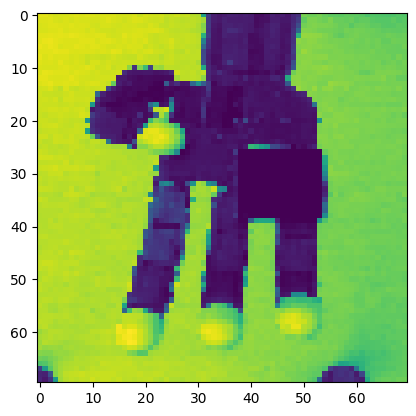

In [ ]:

transform = transforms.Compose([transforms.Resize(70)])

dataset = DataSet(X = X_train[0], Y = Y_train[0], transform = transform)
dataloader = DataLoader(dataset,
                        batch_size = len(dataset) // 15,
                        shuffle = True,
                        num_workers = 0)
                        
train_images, train_labels = next(iter(dataloader))
train_images = train_images

mean_data = torch.mean(train_images, axis = 0)
std_data = torch.std(train_images, axis = 0)

#transform = transforms.Compose([transforms.Resize(70), transforms.Normalize(mean_data, std_data)])

dataset = DataSet(X = X_train[0], Y = Y_train[0], transform = transform)
dataloader = DataLoader(dataset,
                        batch_size = len(dataset) // 15,
                        shuffle = True,
                        num_workers = 0)
                        
train_images, train_labels = next(iter(dataloader))
train_images = train_images


plt.imshow(train_images[0][0])
train_images.shape

In [ ]:
#normalize Data
transform = transforms.Compose([transforms.Resize(70), transforms.Normalize(mean_data, std_data)])

dataset = DataSet(X = X_train[0], Y = Y_train[0], transform = transform)
dataloader = DataLoader(dataset,
                        batch_size = len(dataset) // 15,
                        shuffle = True,
                        num_workers = 0)
                        
train_images, train_labels = next(iter(dataloader))
train_images = train_images


## CNN model

In [ ]:
class CNN(nn.Module):
    def __init__(self, input_size, conv_feature, fc_feature, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(input_size, conv_feature, kernel_size=5)
        self.conv2 = nn.AvgPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(conv_feature, conv_feature, kernel_size=5)
        self.conv4 = nn.AvgPool2d(kernel_size=2)
        self.conv5 = nn.Conv2d(conv_feature, conv_feature, kernel_size=5)
        self.conv6 = nn.AvgPool2d(kernel_size=2)
        self.dropout = nn.Dropout(p=0.5)

        
        # 28x28 = *4, 56x56 = *11
        self.fc1 = nn.Linear(conv_feature * 5 * 5, fc_feature)
        self.fc3 = nn.Linear(fc_feature, fc_feature)
        self.fc2 = nn.Linear(fc_feature, output_size)
        
    def forward(self, x):
        #print(x.shape)
        x = F.relu(self.conv1(x))
        #print(x.shape)
        x = self.conv2(x)
        #print(x.shape)
        x = F.relu(self.conv3(x))
        #print(x.shape)
        x = self.conv4(x)
        #print(x.shape)
        x = F.relu(self.conv5(x))
        print(x.shape)
        x = self.conv6(x)
        print(x.shape)
       
        
        # 28x28 = 96, 56x56 = 726
        x = x.view(-1, 12*5*5)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        print(x.shape)
        
        
        return x

## Train Method

In [ ]:

def train(epoch, model, optimizer):
   
    for batch_idx, (data, target) in enumerate(dataloader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()

        output = model(data)
        
         #Try log since the labels have small values.
        loss = F.mse_loss(output, target)
 
        loss.backward()
        
        optimizer.step()

        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(dataloader.dataset),
            100. * batch_idx / len(dataloader), loss.item()))
    

In [ ]:
output_size = 12 
conv_features = 12 
fc_features = 52

model = CNN(1, conv_features, fc_features, output_size) 
model.to(device)
optimizer = optim.Adam(model.parameters())



In [ ]:
for epoch in range(15):
    train(epoch, model, optimizer)
    dataloader = DataLoader(dataset,
                        batch_size = len(dataset) // 15,
                        shuffle = True,
                        num_workers = 0)
                        
    train_images, train_labels = next(iter(dataloader))
    train_images = train_images

torch.Size([226, 12, 10, 10])
torch.Size([226, 12, 5, 5])
torch.Size([226, 12])
Train Epoch: 0 [0/3396 (0%)]	Loss: 0.876437
torch.Size([226, 12, 10, 10])
torch.Size([226, 12, 5, 5])
torch.Size([226, 12])
Train Epoch: 0 [226/3396 (6%)]	Loss: 0.112843
torch.Size([226, 12, 10, 10])
torch.Size([226, 12, 5, 5])
torch.Size([226, 12])
Train Epoch: 0 [452/3396 (12%)]	Loss: 0.039052
torch.Size([226, 12, 10, 10])
torch.Size([226, 12, 5, 5])
torch.Size([226, 12])
Train Epoch: 0 [678/3396 (19%)]	Loss: 0.017749
torch.Size([226, 12, 10, 10])
torch.Size([226, 12, 5, 5])
torch.Size([226, 12])
Train Epoch: 0 [904/3396 (25%)]	Loss: 0.012374
torch.Size([226, 12, 10, 10])
torch.Size([226, 12, 5, 5])
torch.Size([226, 12])
Train Epoch: 0 [1130/3396 (31%)]	Loss: 0.010627
torch.Size([226, 12, 10, 10])
torch.Size([226, 12, 5, 5])
torch.Size([226, 12])
Train Epoch: 0 [1356/3396 (38%)]	Loss: 0.009665
torch.Size([226, 12, 10, 10])
torch.Size([226, 12, 5, 5])
torch.Size([226, 12])
Train Epoch: 0 [1582/3396 (44%)]	

# Submission Code

In [ ]:
import pickle
import pandas as pd

outfile = 'submission.csv'

output_file = open(outfile, 'w')

titles = ['ID', 'FINGER_POS_1', 'FINGER_POS_2', 'FINGER_POS_3', 'FINGER_POS_4', 'FINGER_POS_5', 'FINGER_POS_6',
         'FINGER_POS_7', 'FINGER_POS_8', 'FINGER_POS_9', 'FINGER_POS_10', 'FINGER_POS_11', 'FINGER_POS_12']
preds = []

test_data = torch.load('csci-ua-473-intro-to-machine-learning-fall-2022/test/test/testX.pt')
file_ids = test_data[-1]
rgb_data = test_data[0]
model.eval()

for i, data in enumerate(rgb_data):
    # Please remember to modify this loop, input and output based on your model/architecture
    X = transform(torch.squeeze(test_data[0][:, :1, :1, :], 1))
    output = model(X)
    preds.append(output[0].cpu().detach().numpy())

df = pd.concat([pd.DataFrame(file_ids), pd.DataFrame.from_records(preds)], axis = 1, names = titles)
df.columns = titles
df.to_csv(outfile, index = False)
print("Written to csv file {}".format(outfile))

torch.Size([849, 12, 10, 10])
torch.Size([849, 12, 5, 5])
torch.Size([849, 12])
torch.Size([849, 12, 10, 10])
torch.Size([849, 12, 5, 5])
torch.Size([849, 12])
torch.Size([849, 12, 10, 10])
torch.Size([849, 12, 5, 5])
torch.Size([849, 12])
torch.Size([849, 12, 10, 10])
torch.Size([849, 12, 5, 5])
torch.Size([849, 12])
torch.Size([849, 12, 10, 10])
torch.Size([849, 12, 5, 5])
torch.Size([849, 12])
torch.Size([849, 12, 10, 10])
torch.Size([849, 12, 5, 5])
torch.Size([849, 12])
torch.Size([849, 12, 10, 10])
torch.Size([849, 12, 5, 5])
torch.Size([849, 12])
torch.Size([849, 12, 10, 10])
torch.Size([849, 12, 5, 5])
torch.Size([849, 12])
torch.Size([849, 12, 10, 10])
torch.Size([849, 12, 5, 5])
torch.Size([849, 12])
torch.Size([849, 12, 10, 10])
torch.Size([849, 12, 5, 5])
torch.Size([849, 12])
torch.Size([849, 12, 10, 10])
torch.Size([849, 12, 5, 5])
torch.Size([849, 12])
torch.Size([849, 12, 10, 10])
torch.Size([849, 12, 5, 5])
torch.Size([849, 12])
torch.Size([849, 12, 10, 10])
torch.Size